Consider the initial value problem
$$
\begin{split}
u'_{1} &= u_{1},\\
u'_{2} &= u_{1} - u_{2},\\
\end{split}
$$
with initial condition $(u_{1}(0),u_{2}(0))=(1,1)$.

Solve $u(T=1)$ with the forward Euler method and verify the convergence rate.

In [1]:
using LinearAlgebra

function ForwardEuler(N,T,u0)
    u = copy(u0)
    unew = copy(u0)
    dt = T/N
    for i = 1 : N
        unew[1] = u[1] + dt * u[1]
        unew[2] = u[2] + dt * (u[1] - u[2])
        u = unew
    end
    return u
end

u0 = [1.0,1.0]
uexact = [exp(1), 0.5*(exp(1)+exp(-1))]
N = 1000
ueuler = ForwardEuler(N,1.0,u0)

# norm(v) ≡ norm(v,2), the 2-norm

println("dt = ", 1.0/N, " ueuler = ", ueuler, " err = ", norm(ueuler-uexact,2)) 

dt = 0.001 ueuler = [2.716923932235896, 1.5434839246936745] err = 0.0014165185769650964


Check the convergence rate

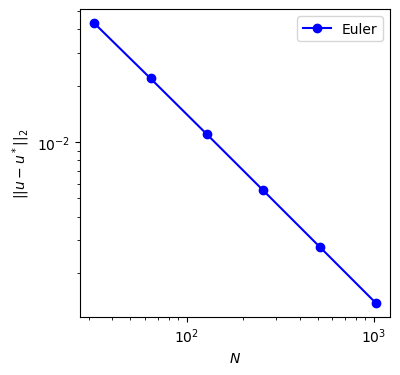

PyObject <matplotlib.legend.Legend object at 0x000000006CE9D190>

In [2]:
NList = 2 .^(5:10)
errEulerList = zeros(size(NList))
for i = 1 : length(NList)
    N = NList[i]
    ueuler = ForwardEuler(N,1.0,u0)
    errEulerList[i] = norm(ueuler-uexact)
end

using PyPlot
figure(1,figsize=(4,4))
loglog(NList, errEulerList, "b-o", label="Euler")

# String starting with letter "L" for latex
xlabel(L"N")
ylabel(L"||u-u^*||_2")
legend()



In [3]:
slopeEuler = -(log(errEulerList[end])-log(errEulerList[1])) / 
(log(NList[end]) - log(NList[1]))

println("Slope for Euler = ", slopeEuler )

Slope for Euler = 0.9920887005180262


Compute the convergence rate without knowing the true solution

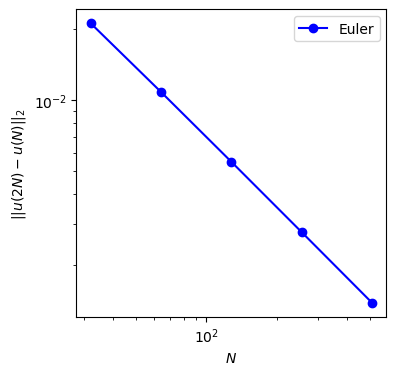

Slope for Euler = 0.9856078658121719


In [12]:
NList = 2 .^(5:10)
diffEulerList = zeros(length(NList)-1)
N = NList[1]
ueuler_prv = ForwardEuler(N,1.0,u0)

for i = 2 : length(NList)
    N = NList[i]
    ueuler = ForwardEuler(N,1.0,u0)
    diffEulerList[i-1] = norm(ueuler-ueuler_prv)
    ueuler_prv = copy(ueuler)
end

using PyPlot
figure(1,figsize=(4,4))
loglog(NList[1:end-1], diffEulerList, "b-o", label="Euler")

# String starting with letter "L" for latex
xlabel(L"N")
ylabel(L"||u(2N)-u(N)||_2")
legend()

slopeEuler = -(log(diffEulerList[end])-log(diffEulerList[1])) / 
(log(NList[end-1]) - log(NList[1]))

println("Slope for Euler = ", slopeEuler )

In [13]:
diffEulerList

5-element Vector{Float64}:
 0.02122973713815525
 0.01084229158768983
 0.005479299731679763
 0.0027543555277275166
 0.0013808753928646624